## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(mouse_data['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
duplicates['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data.loc[(mouse_data['Mouse ID'] !='g989')]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Use describe function to calculate mean and standard deviation of the tumor volume 
regimen = mouse_data_cleaned.groupby(['Drug Regimen'])
regimen_summary = regimen['Tumor Volume (mm3)'].describe()
regimen_summary = regimen_summary[['mean','std']]

# Calculate median, variance, and SEM of the tumor volume. 
median = regimen['Tumor Volume (mm3)'].median()
variance = regimen['Tumor Volume (mm3)'].var()
sem = regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_summary["median"] = median
regimen_summary["variance"] = variance
regimen_summary["SEM"] = sem
regimen_summary

,mean,std,median,variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen['Tumor Volume (mm3)'].aggregate(func = ['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

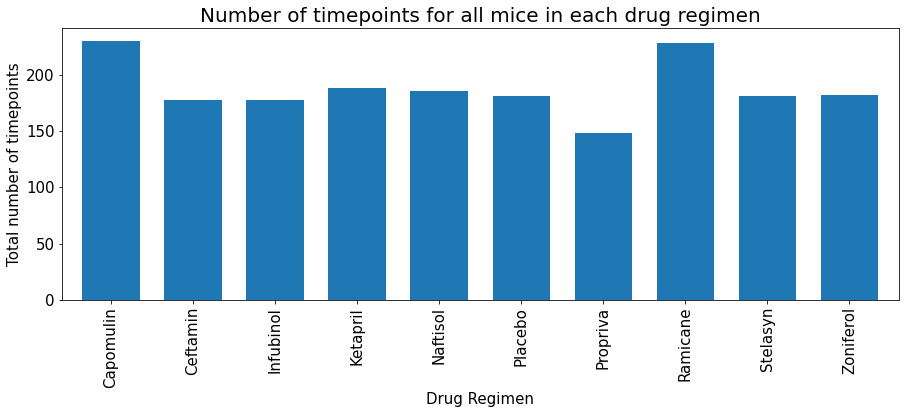

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

#Filter dataset
timepoints = mouse_data_cleaned.groupby(['Drug Regimen']).count()
data = timepoints['Timepoint']

# Use DataFrame.plot() in order to create a bar chart of the data
data.plot(kind="bar", figsize=(15,5), width=0.7, fontsize = '15')

# Set a title for the chart
plt.title("Number of timepoints for all mice in each drug regimen", fontsize='20')
plt.ylabel("Total number of timepoints", fontsize = '15')
plt.xlabel("Drug Regimen", fontsize = '15')

plt.show()

In [74]:
##START HERE ##x-axis is index..... 
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, timepoints["Drug Regimen"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, timepoints["Treatment"], rotation="vertical")


KeyError: 'Drug Regimen'

<Figure size 1440x216 with 0 Axes>

<AxesSubplot:ylabel='Sex'>

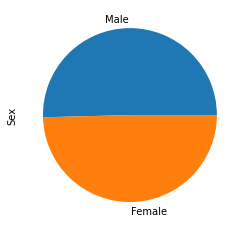

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_data_cleaned.drop_duplicates(subset=["Mouse ID"])
sex = gender["Sex"].value_counts()

sex.plot.pie()

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Tumor Volume (mm3)
merged_df = pd.merge(mouse, last_time, on="Mouse ID")
tumor_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint_x','Timepoint_y']),:]

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_df = mouse_data_cleaned.set_index(['Drug Regimen'])
treatment_filtered = treatment_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
mouse = treatment_filtered.groupby(["Mouse ID"])
last_time = mouse["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treat = treatment_filtered.reset_index()
merged_df = pd.merge(treat, last_time_df, on="Mouse ID",how='left')
end = merged_df.loc[((merged_df['Timepoint_x']) == merged_df['Timepoint_y'])]

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,Capomulin,s185,Female,3,17,45,23.343598,1,45
19,Capomulin,x401,Female,16,15,45,28.484033,0,45
29,Capomulin,m601,Male,22,17,45,28.430964,1,45
34,Capomulin,f966,Male,16,17,20,30.485985,0,20
44,Capomulin,u364,Male,18,17,45,31.023923,3,45
...,...,...,...,...,...,...,...,...,...
773,Ceftamin,x226,Male,23,28,0,45.000000,0,0
783,Ceftamin,x581,Female,19,28,45,64.634949,3,45
793,Ceftamin,x822,Male,3,29,45,61.386660,3,45
803,Ceftamin,y769,Female,6,27,45,68.594745,4,45


In [299]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
from scipy.stats import iqr

    
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset, determine outliers using upper and lower bounds 
    #Capomulin
Capomulin_treatment = end.loc[(end['Drug Regimen'] == "Capomulin")]

cap = Capomulin_treatment['Tumor Volume (mm3)']
iqr(cap)

lower = np.percentile(cap,25) - (iqr(cap)*1.5)
upper = np.percentile(cap,75) + (iqr(cap)*1.5)

Cap_iqr = Capomulin_treatment.loc[(Capomulin_treatment['Tumor Volume (mm3)'] > lower) & (Capomulin_treatment['Tumor Volume (mm3)'] < upper)]
Capomulin.append(Cap_iqr['Tumor Volume (mm3)'])

    #Ramicane
Ramicane_treatment = end.loc[(end['Drug Regimen'] == "Ramicane")]

ram = Ramicane_treatment['Tumor Volume (mm3)']
iqr(ram)

lower = np.percentile(cap,25) - (iqr(ram)*1.5)
upper = np.percentile(cap,75) + (iqr(ram)*1.5)

Ram_iqr = Ramicane_treatment.loc[(Ramicane_treatment['Tumor Volume (mm3)'] > lower) & (Ramicane_treatment['Tumor Volume (mm3)'] < upper)]
Ramicane.append(Ram_iqr['Tumor Volume (mm3)'])

    #Infubinol
Infubinol_treatment = end.loc[(end['Drug Regimen'] == "Infubinol")]

inf = Infubinol_treatment['Tumor Volume (mm3)']
iqr(inf)

lower = np.percentile(cap,25) - (iqr(inf)*1.5)
upper = np.percentile(cap,75) + (iqr(inf)*1.5)

Inf_iqr = Infubinol_treatment.loc[(Infubinol_treatment['Tumor Volume (mm3)'] > lower) & (Infubinol_treatment['Tumor Volume (mm3)'] < upper)]
Infubinol.append(Inf_iqr['Tumor Volume (mm3)'])

    #Ceftamin
Ceftamin_treatment = end.loc[(end['Drug Regimen'] == "Ceftamin")]

cef = Ceftamin_treatment['Tumor Volume (mm3)']
iqr(cef)

lower = np.percentile(cap,25) - (iqr(cef)*1.5)
upper = np.percentile(cap,75) + (iqr(cef)*1.5)

Cef_iqr = Ceftamin_treatment.loc[(Ceftamin_treatment['Tumor Volume (mm3)'] > lower) & (Ceftamin_treatment['Tumor Volume (mm3)'] < upper)]
Ceftamin.append(Cef_iqr['Tumor Volume (mm3)'])

In [334]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pd.DataFrame(Capomulin,columns = ['Capomulin'])
Capomulin.reset_index()
#Remove outliers from dataframe? just use list to calculate iqr??

AttributeError: 'list' object has no attribute 'reset_index'

## Line and Scatter Plots

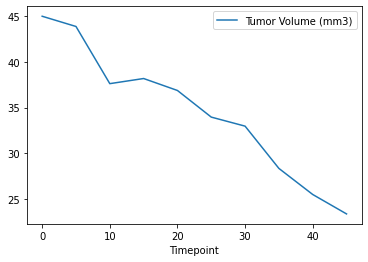

In [345]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data = mouse_data_cleaned.loc[(mouse_data_cleaned['Drug Regimen'] == "Capomulin") & (mouse_data_cleaned['Mouse ID'] == "s185")]

data_plot = data[['Timepoint','Tumor Volume (mm3)']]

data_plot.plot(kind="line", x = 'Timepoint', y = 'Tumor Volume (mm3)')

plt.show()

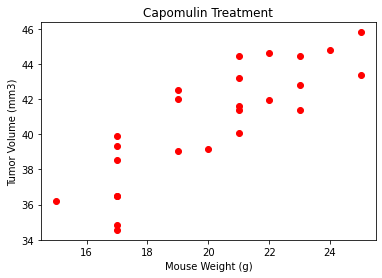

In [363]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create Capomulin subset and group by mouse ID 
data = mouse_data_cleaned.loc[(mouse_data_cleaned['Drug Regimen'] == "Capomulin")]
data_grouped = data.groupby(["Mouse ID"])

#Calculate average to create x and y values 
ave_volume = data_grouped['Tumor Volume (mm3)'].mean()
weight = data_grouped['Weight (g)'].mean()

#Plot data
plt.title("Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
cap_plot = plt.scatter(weight, ave_volume, marker="o", color="red")
plt.show()

## Correlation and Regression

In [364]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


pd.plotting.autocorrelation_plot(cap_plot)

TypeError: object of type 'PathCollection' has no len()